# Sentiment Analysis Tweets

## Extract Data

In [170]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


#Train Data
trainDf =  pd.read_csv('Train.txt', sep='	', names=["id","text","emotion","intensity"], engine='python')
trainDf=trainDf.drop("id",axis=1)
print("Initial Shape of train data:",trainDf.shape)

AngerDf = trainDf[trainDf["emotion"]=="anger"].drop("emotion",axis=1)
AngerDf = AngerDf[AngerDf["intensity"]>=0.35]
AngerDf["emotion"] = 0

FearDf = trainDf[trainDf["emotion"]=="fear"].drop("emotion",axis=1)
FearDf = FearDf[FearDf["intensity"]>=0.4]
FearDf["emotion"] = 1

JoyDf = trainDf[trainDf["emotion"]=="joy"].drop("emotion",axis=1)
JoyDf = JoyDf[JoyDf["intensity"]>=0.292]
JoyDf["emotion"] = 2

SadDf = trainDf[trainDf["emotion"]=="sadness"].drop("emotion",axis=1)
SadDf = SadDf[SadDf["intensity"]>=0.263]
SadDf["emotion"] = 3

trainDf = pd.concat([AngerDf,FearDf,JoyDf,SadDf],ignore_index=True)
print("Final shape of train dataset:",trainDf.shape)
print(trainDf.head(10))
print()


#Cross Validation Data
crossValDf =  pd.read_csv('CrossValidate.txt', sep='	', names=["id","text","emotion","intensity"], engine='python')
crossValDf=crossValDf.drop("id",axis=1)
print("Initial Shape of CV data:",crossValDf.shape)


AngerDf = crossValDf[crossValDf["emotion"]=="anger"].drop("emotion",axis=1)
AngerDf = AngerDf[AngerDf["intensity"]>0.271]
AngerDf["emotion"] = 0

FearDf = crossValDf[crossValDf["emotion"]=="fear"].drop("emotion",axis=1)
FearDf = FearDf[FearDf["intensity"]>=0.250]
FearDf["emotion"] = 1

JoyDf = crossValDf[crossValDf["emotion"]=="joy"].drop("emotion",axis=1)
JoyDf = JoyDf[JoyDf["intensity"]>=0.292]
JoyDf["emotion"] = 2

SadDf = crossValDf[crossValDf["emotion"]=="sadness"].drop("emotion",axis=1)
SadDf = SadDf[SadDf["intensity"]>=0.333]
SadDf["emotion"] = 3

crossValDf = pd.concat([AngerDf,FearDf,JoyDf,SadDf],ignore_index=True)
print("Final shape of CV data:",crossValDf.shape)
print(crossValDf.head(10))
print()


#Test Data
testDf =  pd.read_csv('Test.txt', sep='	', names=["id","text","emotion","intensity"], engine='python')
testDf=testDf.drop("id",axis=1)
print("Initial Shape of Test data:",testDf.shape)


AngerDf = testDf[testDf["emotion"]=="anger"].drop("emotion",axis=1)
AngerDf = AngerDf[AngerDf["intensity"]>=0.400]
AngerDf["emotion"] = 0

FearDf = testDf[testDf["emotion"]=="fear"].drop("emotion",axis=1)
FearDf = FearDf[FearDf["intensity"]>=0.438]
FearDf["emotion"] = 1

JoyDf = testDf[testDf["emotion"]=="joy"].drop("emotion",axis=1)
JoyDf = JoyDf[JoyDf["intensity"]>=0.400]
JoyDf["emotion"] = 2

SadDf = testDf[testDf["emotion"]=="sadness"].drop("emotion",axis=1)
SadDf = SadDf[SadDf["intensity"]>=0.354]
SadDf["emotion"] = 3

testDf = pd.concat([AngerDf,FearDf,JoyDf,SadDf],ignore_index=True)
print("Final shape of Test data:",testDf.shape)
print(testDf.head(10))

Initial Shape of train data: (3317, 3)
Final shape of train dataset: (2840, 3)
                                                text  intensity  emotion
0  How the fu*k! Who the heck! moved my fridge!.....      0.938        0
1  So my Indian Uber driver just called someone t...      0.896        0
2  @DPD_UK I asked for my parcel to be delivered ...      0.896        0
3  so ef whichever butt wipe pulled the fire alar...      0.896        0
4  Don't join @BTCare they put the phone down on ...      0.896        0
5                                My blood is boiling      0.875        0
6  When you've still got a whole season of Wentwo...      0.875        0
7  @bt_uk why does tracking show my equipment del...      0.875        0
8  @TeamShanny legit why i am so furious with him...      0.875        0
9  How is it suppose to work if you do that? Wtf ...      0.875        0

Initial Shape of CV data: (347, 3)
Final shape of CV data: (296, 3)
                                                t

In [171]:
data_train= trainDf.drop(["intensity"],axis=1)
data_cv   = crossValDf.drop(["intensity"],axis=1)
data_test = testDf.drop(["intensity"],axis=1)

# emotion=0 means anger
# emotion=1 means fear
# emotion=2 means joy
# emotion=3 means sadness

## Text Cleaning

In [172]:
import re
import nltk
from nltk.corpus import stopwords
nltk.download("stopwords")

#Get set of english stop words and prepare stemmer
#Stop words for bag of words are different because we will use bigrams
stop=set(stopwords.words("english"))
stop_bow = set(stopwords.words("english"))
stop_bow.discard("not")
stop_bow.discard("no")
sno = nltk.stem.SnowballStemmer("english")

#Train data cleaning
train_text=data_train["text"]
cleaned_text_bow=[]
cleaned_text=[]
for line in train_text:
    #Removing tags(ex-@abhishek is a name and not needed)
    tags = re.compile("^@[a-zA-Z_]*")
    line = re.sub(tags," ",line)
    #Replacing # and * with a ""
    hashtags = re.compile("#|\*")
    line = re.sub(hashtags,"",line)
    #Replacing all other characters with a space
    extraCharacters = re.compile("[^a-zA-Z]")
    line = re.sub(extraCharacters," ",line)

    #Conversion of line to array of words for word2vec
    filtered_words=[]
    filtered_words_bow=""
    for word in line.split():
        word=word.lower()
        if(word not in stop):
            word = sno.stem(word)
            filtered_words.append(word)
        if(word not in stop_bow):
            word = sno.stem(word)
            filtered_words_bow+=" "+word
    cleaned_text.append(filtered_words)
    cleaned_text_bow.append(filtered_words_bow)
            
data_train_bow = pd.DataFrame(data=cleaned_text_bow,columns=["text"])
data_train_bow["emotion"] = data_train["emotion"]
data_train["text"]=cleaned_text
print(data_train.head(10))
print()
print(data_train_bow.head(10))
print()

#Cross Validate data cleaning
cv_text=data_cv["text"][0:]
cleaned_text=[]
cleaned_text_bow=[]
for line in cv_text:
    #Removing tags(ex-@abhishek is a name and not needed)
    tags = re.compile("^@[a-zA-Z_]*")
    line = re.sub(tags," ",line)
    #Replacing # and * with "" 
    hashtags = re.compile("#|\*")
    line = re.sub(hashtags,"",line)
    #Replacing all other characters with a space
    extraCharacters = re.compile("[^a-zA-Z]")
    line = re.sub(extraCharacters," ",line)
    
    #Conversion of line to array of words
    filtered_words=[]
    filtered_words_bow=""
    for word in line.split():
        word=word.lower()
        if(word not in stop):
            word = sno.stem(word)
            filtered_words.append(word)
            filtered_words_bow+=" "+word
    cleaned_text.append(filtered_words)
    cleaned_text_bow.append(filtered_words_bow)
            
data_cv_bow = pd.DataFrame(data=cleaned_text_bow, columns=["text"])
data_cv_bow["emotion"]=data_cv["emotion"]
data_cv["text"]=cleaned_text
print(data_cv.head(10))
print()
print(data_cv_bow.head(10))
print()

#Test data cleaning
test_text=data_test["text"][0:]
cleaned_text=[]
cleaned_text_bow=[]
for line in test_text:
    #Removing tags(ex-@abhishek is a name and not needed)
    tags = re.compile("^@[a-zA-Z_]*")
    line = re.sub(tags," ",line)
    #Replacing hash and * with ""
    hashtags = re.compile("#|\*")
    line = re.sub(hashtags,"",line)
    #Replacing all other characters with a space
    extraCharacters = re.compile("[^a-zA-Z]")
    line = re.sub(extraCharacters," ",line)
    
    #Conversion of line to array of words
    filtered_words=[]
    filtered_words_bow=""
    for word in line.split():
        word=word.lower()
        if(word not in stop):
            word = sno.stem(word)
            filtered_words.append(word)
            filtered_words_bow+=" "+word
    cleaned_text.append(filtered_words)
    cleaned_text_bow.append(filtered_words_bow)
            
data_test_bow = pd.DataFrame(data=cleaned_text_bow, columns=["text"])
data_test_bow["emotion"]=data_test["emotion"]
data_test["text"]=cleaned_text
print(data_test.head(10))
print(data_test_bow.head(10))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


                                                text  emotion
0  [fuk, heck, move, fridg, knock, landlord, door...        0
1  [indian, uber, driver, call, someon, n, word, ...        0
2  [ask, parcel, deliv, pick, store, address, fum...        0
3  [ef, whichev, butt, wipe, pull, fire, alarm, d...        0
4  [join, btcare, put, phone, talk, rude, take, m...        0
5                                      [blood, boil]        0
6  [still, got, whole, season, wentworth, watch, ...        0
7  [track, show, equip, deliv, servic, sudden, de...        0
8               [legit, furious, peopl, fuck, idiot]        0
9             [suppos, work, wtf, dude, thank, piss]        0

                                                text  emotion
0   fuk heck move fridg knock landlord door angri...        0
1   indian uber driver call someon n word move ve...        0
2   ask parcel deliv pick store not address fume ...        0
3   ef whichev butt wipe pull fire alarm davi bc ...        0
4   joi

## Text Vectorization(Word2Vec)

In [173]:
import gensim
from tqdm import tqdm

#Train on text data
list_of_sent = data_train["text"]
w2v_model=gensim.models.Word2Vec(list_of_sent,min_count=4,size=200, workers=4)
w2v_words=list(w2v_model.wv.vocab)

#Vectorize text data
listof_sent_vec=[]
#tqdm is for improving speed and making progressbar
#Vectorization and normalization both going on
for sent in tqdm(list_of_sent): 
    sent_vec = np.zeros(200) 
    cnt_words =0; 
    for word in sent: 
        if word in w2v_words:
            vec = w2v_model.wv[word]
            sent_vec += vec
            cnt_words += 1
    if cnt_words != 0:
        sent_vec /= cnt_words
    listof_sent_vec.append(sent_vec)
    
Label = data_train["emotion"]
list_col=tuple(range(200))
W2v_data_train=pd.DataFrame(data=listof_sent_vec, columns=list_col)
W2v_data_train["emotion"] = Label
print(W2v_data_train.head(10))
print(W2v_data_train.shape)

100%|████████████████████████████████████████████████████████████████████████████| 2840/2840 [00:00<00:00, 5056.80it/s]


          0         1         2         3         4         5         6  \
0  0.013472 -0.002643 -0.002386 -0.010496  0.003722 -0.010532 -0.012740   
1  0.019703 -0.002996 -0.005474 -0.016783  0.006017 -0.017123 -0.019851   
2  0.010749 -0.002280 -0.002216 -0.009394  0.003831 -0.009362 -0.011344   
3  0.012123 -0.002931 -0.002724 -0.009901  0.003857 -0.009814 -0.012030   
4  0.016467 -0.004166 -0.004989 -0.014461  0.005393 -0.014840 -0.015774   
5  0.010715 -0.002747 -0.002845 -0.010962  0.003966 -0.011346 -0.010518   
6  0.022664 -0.005464 -0.006056 -0.020814  0.007806 -0.020568 -0.022760   
7  0.012641 -0.002713 -0.002349 -0.011614  0.004803 -0.011103 -0.012701   
8  0.020672 -0.005444 -0.006270 -0.019810  0.006601 -0.020033 -0.020519   
9  0.015026 -0.004241 -0.002886 -0.013001  0.004992 -0.013171 -0.013722   

          7         8         9  ...       191       192       193       194  \
0 -0.003763  0.003988 -0.011406  ...  0.004814 -0.020263 -0.004627 -0.002925   
1 -0.005533  0

In [174]:
#Vectorize Cross Validate
list_of_sent= data_cv["text"]
listof_sent_vec=[]

for sent in tqdm(list_of_sent): 
    sent_vec = np.zeros(200) 
    cnt_words =0; 
    for word in sent: 
        if word in w2v_words:
            vec = w2v_model.wv[word]
            sent_vec += vec
            cnt_words += 1
    if cnt_words != 0:
        sent_vec /= cnt_words
    listof_sent_vec.append(sent_vec)
    
Label = data_cv["emotion"]
list_col=tuple(range(200))
W2v_data_cv=pd.DataFrame(data=listof_sent_vec, columns=list_col)
W2v_data_cv["emotion"] = Label
print(W2v_data_cv.head(10))
print(W2v_data_cv.shape)


#test
list_of_sent= data_test["text"]
listof_sent_vec=[]

for sent in tqdm(list_of_sent): 
    sent_vec = np.zeros(200) 
    cnt_words =0; 
    for word in sent: 
        if word in w2v_words:
            vec = w2v_model.wv[word]
            sent_vec += vec
            cnt_words += 1
    if cnt_words != 0:
        sent_vec /= cnt_words
    listof_sent_vec.append(sent_vec)
    
Label = data_test["emotion"]
list_col=tuple(range(200))
W2v_data_test=pd.DataFrame(data=listof_sent_vec, columns=list_col)
W2v_data_test["emotion"] = Label
print(W2v_data_test.head(10))
print(W2v_data_test.shape)

100%|██████████████████████████████████████████████████████████████████████████████| 296/296 [00:00<00:00, 3699.82it/s]


          0         1         2         3         4         5         6  \
0  0.010519 -0.000610 -0.003224 -0.010396  0.002755 -0.009832 -0.011947   
1  0.015979 -0.002877 -0.004507 -0.013044  0.004520 -0.014129 -0.015517   
2  0.020912 -0.003617 -0.005015 -0.019261  0.006324 -0.017602 -0.019848   
3  0.028075 -0.005537 -0.007766 -0.023819  0.008219 -0.024770 -0.027021   
4  0.029634 -0.006502 -0.007587 -0.026205  0.009864 -0.025478 -0.029309   
5  0.029763 -0.006429 -0.007608 -0.026233  0.009750 -0.025737 -0.029574   
6  0.020432 -0.004528 -0.005256 -0.017770  0.005667 -0.018213 -0.019715   
7  0.018470 -0.003607 -0.004092 -0.016181  0.006053 -0.017008 -0.018823   
8  0.019163 -0.004016 -0.004283 -0.016315  0.006270 -0.017746 -0.019690   
9  0.019677 -0.004028 -0.003760 -0.016057  0.005298 -0.018112 -0.020296   

          7         8         9  ...       191       192       193       194  \
0 -0.004180  0.003401 -0.009710  ...  0.004813 -0.018769 -0.002982 -0.002301   
1 -0.004173  0

100%|██████████████████████████████████████████████████████████████████████████████| 998/998 [00:00<00:00, 4271.38it/s]


          0         1         2         3         4         5         6  \
0  0.022052 -0.004350 -0.005470 -0.019518  0.006583 -0.019356 -0.021394   
1  0.013827 -0.002279 -0.002398 -0.012314  0.005961 -0.012364 -0.014160   
2  0.014019 -0.002112 -0.002912 -0.012808  0.006276 -0.012530 -0.015027   
3  0.009172 -0.001483 -0.002013 -0.008406  0.001740 -0.007620 -0.009449   
4  0.022296 -0.004647 -0.007089 -0.019880  0.007006 -0.018919 -0.023079   
5  0.007225 -0.003645 -0.000309 -0.007825  0.003295 -0.008798 -0.008626   
6  0.018884 -0.004423 -0.005062 -0.017810  0.007862 -0.015763 -0.020787   
7  0.017075 -0.003919 -0.005075 -0.017053  0.007478 -0.014775 -0.019411   
8  0.013844 -0.002474 -0.003562 -0.012934  0.004710 -0.010928 -0.012883   
9  0.017987 -0.004083 -0.004108 -0.016922  0.006798 -0.017421 -0.018688   

          7         8         9  ...       191       192       193       194  \
0 -0.006646  0.006815 -0.017987  ...  0.008710 -0.036591 -0.007520 -0.003454   
1 -0.004655  0

In [175]:
X_train_w2v = W2v_data_train.drop("emotion",axis=1).to_numpy()
y_train_w2v = W2v_data_train["emotion"].to_numpy()

X_cv_w2v = W2v_data_cv.drop("emotion",axis=1).to_numpy()
y_cv_w2v = W2v_data_cv["emotion"].to_numpy()

X_test_w2v = W2v_data_test.drop("emotion",axis=1).to_numpy()
y_test_w2v = W2v_data_test["emotion"].to_numpy()

print("Final shape of Train X and y for word2vec:",X_train.shape,y_train.shape)
print("Final shape of CV X and y for word2vec:",X_cv.shape,y_cv.shape)
print("Final shape of Test X and y for word2vec:",X_test.shape,y_test.shape)

Final shape of Train X and y for word2vec: (2840, 300) (2840,)
Final shape of CV X and y for word2vec: (296, 300) (296,)
Final shape of Test X and y for word2vec: (998, 300) (998,)


## Text Vectorization(bag of words)

In [176]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import normalize

#Train bag of words
bow_model = CountVectorizer(ngram_range=(1,2))
bow_model.fit(data_train_bow["text"])

X_train_bow = normalize(bow_model.transform(data_train_bow["text"])).tocsr()
y_train_bow = data_train_bow["emotion"].to_numpy()

X_cv_bow = normalize(bow_model.transform(data_cv_bow["text"])).tocsr()
y_cv_bow = data_cv_bow["emotion"].to_numpy()

X_test_bow = normalize(bow_model.transform(data_test_bow["text"])).tocsr()
y_test_bow = data_test_bow["emotion"].to_numpy()

print("Final shape of Train X and y for bag of words:",X_train_bow.shape,y_train_bow.shape)
print("Final shape of CV X and y for bag of words:",X_cv_bow.shape,y_cv_bow.shape)
print("Final shape of Test X and y for bag of words:",X_test_bow.shape,y_test_bow.shape)

Final shape of Train X and y for bag of words: (2840, 24681) (2840,)
Final shape of CV X and y for bag of words: (296, 24681) (296,)
Final shape of Test X and y for bag of words: (998, 24681) (998,)


## Modelling

###  Preparation

In [177]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score

def showCnfMat(y_true,y_pred):
    mat = confusion_matrix(y_true,y_pred)
    for arr in mat:
        print(" ".join(list(map(str, arr))))
        
def plotHyperparameterScores(values,scores,scoring="f1",parameter="Lamda"):
    if(scoring=="f1"):
        bestScore = min(scores)
    elif(scoring=="accuracy"):
        bestScore = max(scores)
    index = scores.index(bestScore)
    val = values[index]
    plt.plot(values,scores)
    plt.show()
    print(f"Best Score at {parameter}: {val}")
    return val

### KNN

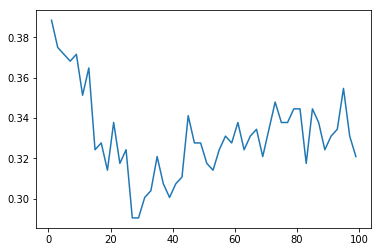

Best Score at K: 1
Final accuracy on train data: 0.9873239436619718
Final accuracy on CV data: 0.3885135135135135
Final accuracy on test data: 0.3717434869739479

Confusion Matrix on Test Data:
91 44 47 64
49 70 42 48
35 44 111 49
70 83 52 99


In [178]:
from sklearn.neighbors import KNeighborsClassifier

k_values = range(1,100,2)
cv_scores= []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k, weights="uniform", p=2)
    knn.fit(X_train_w2v,y_train_w2v)
    y_pred = knn.predict(X_cv_w2v)
    cv_scores.append(accuracy_score(y_cv_w2v,y_pred))
    
optimal_k = plotHyperparameterScores(k_values,cv_scores,"accuracy","K")
knn_model = KNeighborsClassifier(n_neighbors=optimal_k, weights="uniform", p=2)
knn_model.fit(X_train_w2v, y_train_w2v)

y_predTrain= knn_model.predict(X_train_w2v)
y_predCV = knn_model.predict(X_cv_w2v)
y_predTest = knn_model.predict(X_test_w2v)
accTrain = accuracy_score(y_train_w2v, y_predTrain)
accCV = accuracy_score(y_cv_w2v, y_predCV)
accTest = accuracy_score(y_test_w2v, y_predTest)
print("Final accuracy on train data:",accTrain)
print("Final accuracy on CV data:",accCV)
print("Final accuracy on test data:",accTest)

print("\nConfusion Matrix on Test Data:")
showCnfMat(y_test_w2v,y_predTest)

### Logistic Regression

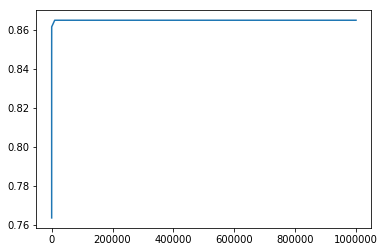

Best Score at C: 10000
Final accuracy on train data: 0.9890845070422535
Final accuracy on CV data: 0.8648648648648649
Final accuracy on test data: 0.8206412825651302

Confusion Matrix on Test Data:
189 16 14 27
16 164 11 18
5 10 220 4
18 26 14 246


In [193]:
from sklearn.linear_model import LogisticRegression

C_values=[10**-1,10**0,10**1,10**2,10**4,10**5,10**6]
cv_scores = []

for C in C_values:
    LR = LogisticRegression(C=C, solver="liblinear",multi_class="auto")
    LR.fit(X_train_bow,y_train_bow)
    y_pred = LR.predict(X_cv_bow)
    cv_scores.append(accuracy_score(y_cv_bow,y_pred))
    
optimal_C = plotHyperparameterScores(C_values,cv_scores,"accuracy","C")
LR_model = LogisticRegression(C=optimal_C, solver="liblinear",multi_class="auto")
LR_model.fit(X_train_bow, y_train_bow)

y_predTrain= LR_model.predict(X_train_bow)
y_predCV = LR_model.predict(X_cv_bow)
y_predTest = LR_model.predict(X_test_bow)
accTrain = accuracy_score(y_train_bow, y_predTrain)
accCV = accuracy_score(y_cv_bow, y_predCV)
accTest = accuracy_score(y_test_bow, y_predTest)
print("Final accuracy on train data:",accTrain)
print("Final accuracy on CV data:",accCV)
print("Final accuracy on test data:",accTest)

print("\nConfusion Matrix on Test Data:")
showCnfMat(y_test_bow,y_predTest)

### Multinomial Naive Bayes

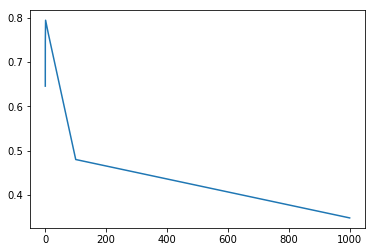

Best Score at alpha: 1
Final accuracy on train data: 0.9855633802816901
Final accuracy on CV data: 0.793918918918919
Final accuracy on test data: 0.7995991983967936

Confusion Matrix on Test Data:
184 21 11 30
14 166 12 17
5 17 208 9
17 30 17 240


In [201]:
from sklearn.naive_bayes import MultinomialNB

alpha_values=[10**-3,10**-2,10**-1,10**0,10**1,10**2,10**3]
cv_scores = []

for alpha in alpha_values:
    NB = MultinomialNB(alpha=alpha)
    NB.fit(X_train_bow,y_train_bow)
    y_pred = NB.predict(X_cv_bow)
    cv_scores.append(accuracy_score(y_cv_bow,y_pred))
    
optimal_alpha = plotHyperparameterScores(alpha_values,cv_scores,"accuracy","alpha")
NB_model = MultinomialNB(alpha=optimal_alpha)
NB_model.fit(X_train_bow, y_train_bow)

y_predTrain= NB_model.predict(X_train_bow)
y_predCV = NB_model.predict(X_cv_bow)
y_predTest = NB_model.predict(X_test_bow)
accTrain = accuracy_score(y_train_bow, y_predTrain)
accCV = accuracy_score(y_cv_bow, y_predCV)
accTest = accuracy_score(y_test_bow, y_predTest)
print("Final accuracy on train data:",accTrain)
print("Final accuracy on CV data:",accCV)
print("Final accuracy on test data:",accTest)

print("\nConfusion Matrix on Test Data:")
showCnfMat(y_test_bow,y_predTest)

### Random Forest